<a href="https://colab.research.google.com/github/kalyanimane/data-science-assignments/blob/main/clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
file_path = '/content/EastWestAirlines.xlsx'
xls = pd.ExcelFile(file_path)

xls.sheet_names


['Description', 'data']

In [4]:
#Load the 'Description' sheet to understand the dataset structure
description_df = pd.read_excel(xls, 'Description')
#Display the content of the description sheet to understand the dataset
description_df.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [5]:
data_df=pd.read_excel(xls, 'data')
data_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data_df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [8]:
description_df.isnull().sum()

,0
East-West Airlines is trying to learn more about its customers. Key issues are their,8
Unnamed: 1,13
Unnamed: 2,20
Unnamed: 3,13
Unnamed: 4,8


In [7]:
data_df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
description_df.describe()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,18,13,6,13,18
unique,18,3,3,3,18
top,"flying patterns, earning and use of frequent f...",NUMBER,1,Raw,Description
freq,1,9,3,9,1


In [10]:
#replace missing values with "NaN" and assign the result back to the DataFrame
description_df[['Unnamed: 1' , 'Unnamed: 2','Unnamed: 3', 'Unnamed: 4']] = description_df[['Unnamed: 1' , 'Unnamed: 2','Unnamed: 3', 'Unnamed: 4']].fillna("NaN")

In [11]:
description_df

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [12]:
description_df.isnull().sum()

,0
East-West Airlines is trying to learn more about its customers. Key issues are their,8
Unnamed: 1,0
Unnamed: 2,0
Unnamed: 3,0
Unnamed: 4,0


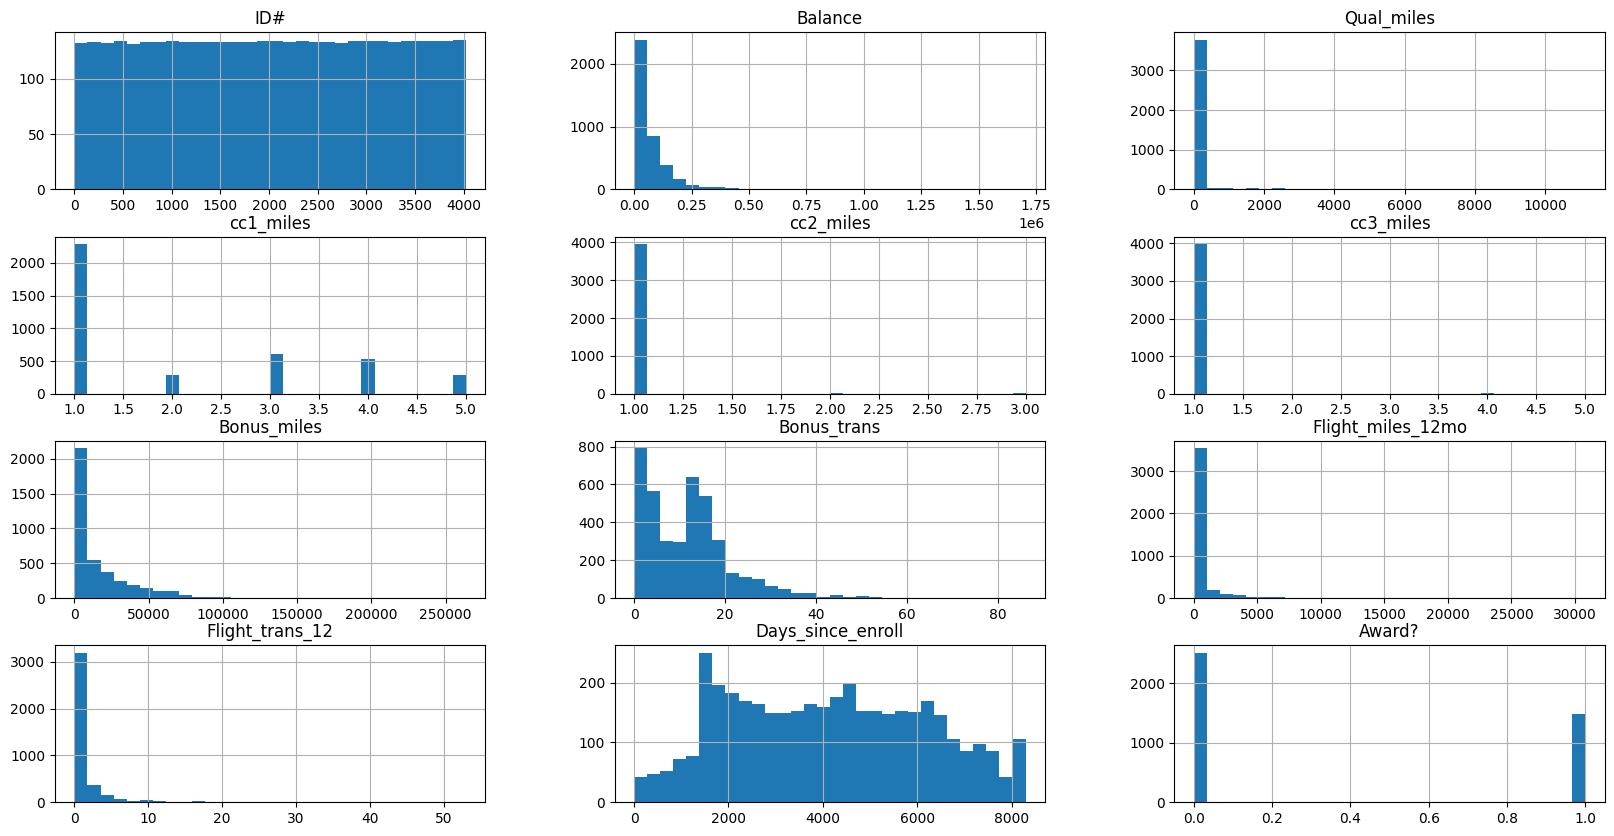

In [13]:
import matplotlib.pyplot as plt
data_df.hist(bins=30, figsize=(20,10))
plt.show()

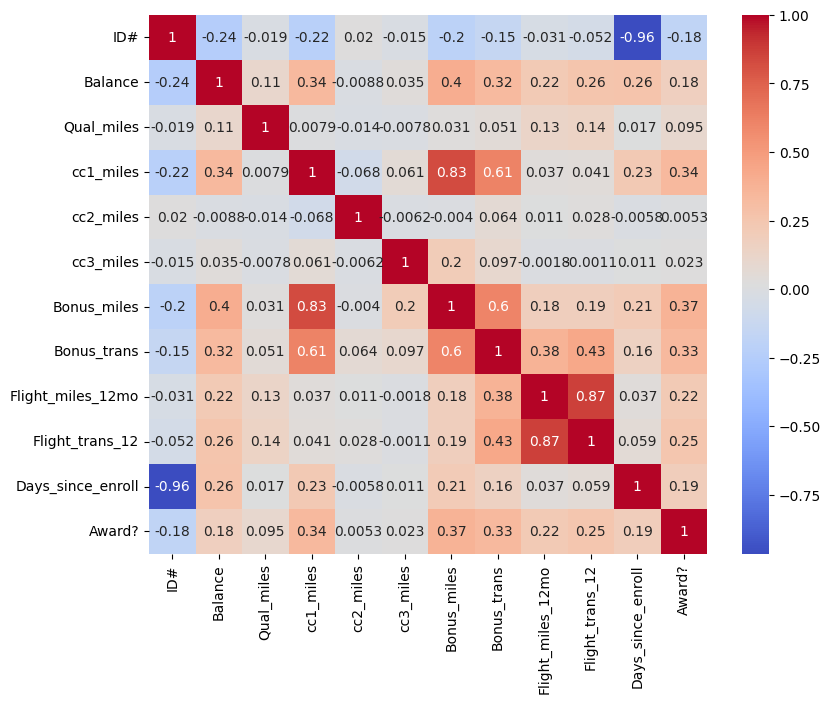

In [15]:
import seaborn as sns
plt.figure(figsize=(9,7))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df.drop(columns=['ID#', 'Award?']))


In [ ]:
#KMeans clustering

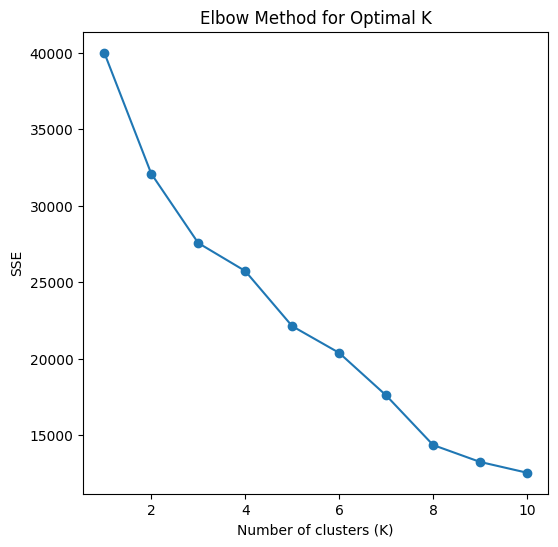

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
sse = []
k_values=range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(6, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

In [18]:
optimal_k = 3  # Replace with the actual value from the Elbow method


In [19]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
clusters = kmeans.fit_predict(scaled_data)

In [20]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
kmeans

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Hieararchical clustering

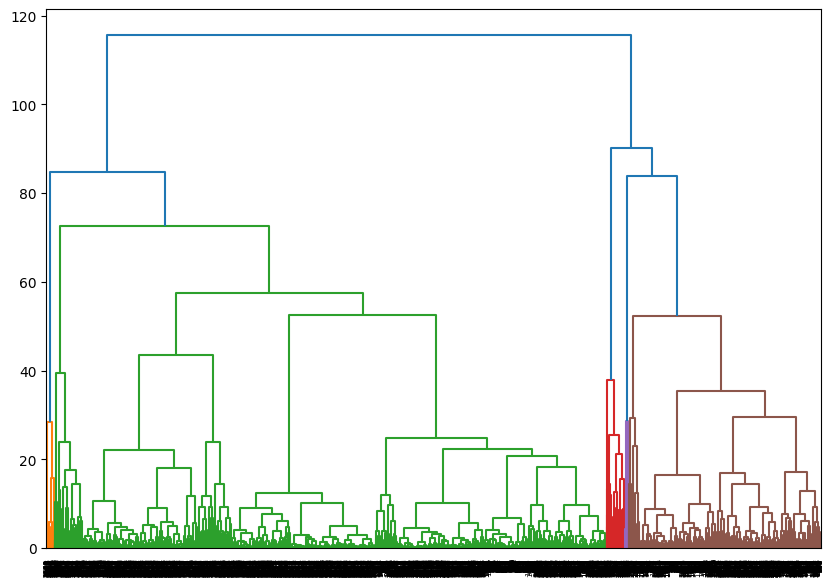

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
Z = linkage(scaled_data, method='ward')
dendrogram(Z)
plt.show()


In [ ]:
#DB Scan

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(scaled_data)


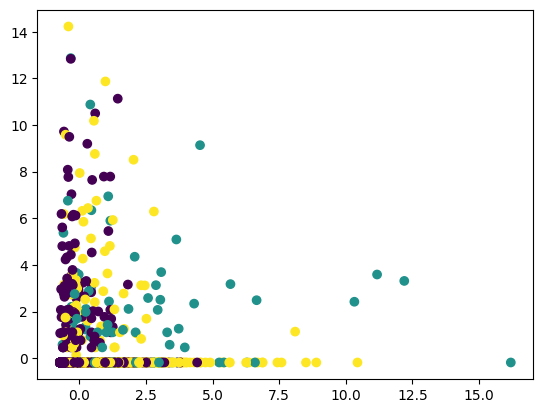

In [24]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.show()


In [ ]:
# Evalution

In [25]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.3303711060539158
